In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer



# Gene Gene Interactions
E stands for essential genes and N for nonessential genes.

In [31]:
path = "../data/"

GxG_data_Costanzo_ExE = pd.read_csv(path + 'SGA_ExE_clustered.cdt', sep = '\t', dtype = 'str')
GxG_data_Costanzo_ExN = pd.read_csv(path + 'SGA_ExN_clustered.cdt', sep = '\t', dtype = 'str')
GxG_data_Costanzo_NxN = pd.read_csv(path + 'SGA_NxN_clustered.cdt', sep = '\t', dtype = 'str')

In [32]:
GxG_data_Costanzo_ExE

,GID,Strain,ORF,Name,Label,GWEIGHT,tsa1184,tsa1067,tsa1100,tsa1111,...,tsa950,tsa367,tsa676,tsa859,tsa860,tsa989,tsa1034,tsa927,tsa1239,tsa932
0,AID,NaN,NaN,NaN,NaN,NaN,ARRY154X,ARRY47X,ARRY76X,ARRY87X,...,ARRY759X,ARRY405X,ARRY594X,ARRY697X,ARRY699X,ARRY777X,ARRY20X,ARRY742X,ARRY202X,ARRY745X
1,ORF,NaN,NaN,NaN,NaN,NaN,YDR478W,YHR040W,YIL104C,YDR064W,...,YBL034C,YBR055C,YLR105C,YDL103C,YDL103C,YKL104C,YKL024C,YOR074C,YDR081C,YOR204W
2,Name,NaN,NaN,NaN,NaN,NaN,SNM1,BCD1,SHQ1,RPS13,...,STU1,PRP6,SEN2,QRI1,QRI1,GFA1,URA6,CDC21,PDC2,DED1
3,Label,NaN,NaN,NaN,NaN,NaN,snm1-5001,bcd1-5001,shq1-5001,rps13-5001,...,stu1-7,prp6-ts,sen2-1,qri1-ts1,qri1-ts6,gfa1-97,ura6-6,cdc21-1,pdc2-5001,ded1-f144c
4,EWEIGHT,NaN,NaN,NaN,NaN,NaN,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
824,GENE519X,tsq26,YAL038W,CDC19,cdc19-1,1,0.041,0.028,0.042,0.006,...,-0.022,-0.005,-0.021,0.022,-0.004,0.017,0.027,-0.161,0.063,-0.028
825,GENE604X,tsq455,YBR055C,PRP6,prp6-1,1,0.024,-0.046,0.049,0.006,...,NaN,NaN,-0.003,0.004,0.048,0.036,0.067,0.099,0.054,0.016
826,GENE614X,tsq472,YGR091W,PRP31,prp31-1,1,0.058,0.067,0.019,-0.007,...,-0.043,-0.011,0.022,0.014,0.020,0.023,0.060,0.055,0.113,0.043
827,GENE721X,tsq676,YLR105C,SEN2,sen2-1,1,0.018,0.020,0.031,0.004,...,-0.069,-0.007,NaN,0.039,0.004,0.037,0.012,0.093,0.123,0.043


In [33]:
GxG_data_Costanzo_ExN

,GID,Strain,ORF,Name,Label,GWEIGHT,dma3509,dma3243,dma3812,dma3908,...,dma750,dma3957,dma2604,dma998,dma4951,dma826,dma4263,dma4575,dma5223,dma615
0,AID,NaN,NaN,NaN,NaN,NaN,ARRY2010X,ARRY1794X,ARRY2271X,ARRY2338X,...,ARRY3621X,ARRY2368X,ARRY1268X,ARRY3825X,ARRY3104X,ARRY3675X,ARRY2508X,ARRY2790X,ARRY3328X,ARRY3507X
1,ORF,NaN,NaN,NaN,NaN,NaN,YML003W,YLR182W,YMR215W,YMR305C,...,YDL180W,YNL027W,YJL204C,YDR251W,YPL220W,YDL234C,YNR062C,YOR182C,YDR036C,YDL018C
2,Name,NaN,NaN,NaN,NaN,NaN,NaN,SWI6,GAS3,SCW10,...,NaN,CRZ1,RCY1,PAM1,RPL1A,GYP7,NaN,RPS30B,EHD3,ERP3
3,Label,NaN,NaN,NaN,NaN,NaN,yml003w,swi6,gas3,scw10,...,ydl180w,crz1,rcy1,pam1,rpl1a,gyp7,ynr062c,rps30b,ehd3,erp3
4,EWEIGHT,NaN,NaN,NaN,NaN,NaN,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2063,GENE1056X,sn543,YKL176C,LST4,lst4,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2064,GENE20X,sn1089,YGR163W,GTR2,gtr2,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2065,GENE2043X,tsq955,YLR321C,SFH1,sfh1-1,1,0.001,NaN,-0.005,0.013,...,0.007,0.038,-0.019,0.028,-0.012,-0.025,0.012,0.189,-0.038,0.003
2066,GENE1057X,sn544,YGR057C,LST7,lst7,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
GxG_data_Costanzo_NxN

,GID,Strain,ORF,Name,Label,GWEIGHT,dma1902,dma1903,dma3438,dma366,...,dma4474,dma3868,dma3921,dma3907,dma3910,dma3911,dma3918,dma4686,dma4867,dma5251
0,AID,NaN,NaN,NaN,NaN,NaN,ARRY690X,ARRY691X,ARRY1965X,ARRY2138X,...,ARRY2701X,ARRY2300X,ARRY2348X,ARRY2337X,ARRY2340X,ARRY2341X,ARRY2345X,ARRY2876X,ARRY3038X,ARRY3347X
1,ORF,NaN,NaN,NaN,NaN,NaN,YGR152C,YGR151C,YLR408C,YBR219C,...,YOR042W,YMR265C,YMR316C-B,YMR306C-A,YMR304C-A,YMR303C,YMR318C,YOR296W,YPL133C,YCR107W
2,Name,NaN,NaN,NaN,NaN,NaN,RSR1,NaN,BLS1,NaN,...,CUE5,NaN,NaN,NaN,NaN,ADH2,ADH6,NaN,RDS2,AAD3
3,Label,NaN,NaN,NaN,NaN,NaN,rsr1,ygr151c,bls1,ybr219c,...,cue5,ymr265c,ymr316c-b,ymr306c-a,ymr304c-a,adh2,adh6,yor296w,rds2,aad3
4,EWEIGHT,NaN,NaN,NaN,NaN,NaN,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3283,GENE3020X,sn672,YGR041W,BUD9,bud9,1,NaN,NaN,0.059,0.043,...,-0.005,0.002,0.030,0.040,-0.021,-0.004,0.079,0.011,0.044,0.007
3284,GENE3044X,sn701,YLR020C,YEH2,yeh2,1,0.002,0.050,-0.005,-0.012,...,-0.004,0.036,-0.000,0.009,0.105,0.056,0.135,-0.001,0.052,0.005
3285,GENE3143X,sn825,YKR102W,FLO10,flo10,1,-0.022,-0.060,-0.011,-0.044,...,0.048,0.019,0.006,0.026,0.001,0.053,0.102,-0.081,0.018,-0.011
3286,GENE3052X,sn711,YBL043W,ECM13,ecm13,1,-0.059,0.006,-0.199,-0.035,...,0.001,0.029,-0.040,0.002,-0.004,-0.006,0.001,0.006,0.043,-0.019


Helper functions for visualisation & building a matrix out of interactions

In [35]:
def visualize_nan_proportion(dataset, color = 'brown', show_proportion = True, visualize = True):

    allowed_nan_proportions = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
    gene_counts = []
    size = dataset.shape[1]

    for proportion in allowed_nan_proportions:
        max_nan = (size * proportion) // 100
        filtered_gene_size = len(dataset.loc[:, dataset.isna().sum() <= max_nan].columns)
        gene_counts.append(filtered_gene_size)
        if show_proportion:
            print("Gene count after removing interactions with " + str(proportion) + "% nan values: " + str(filtered_gene_size))
        if (filtered_gene_size == size):
            break

    if show_proportion:
        print("Gene count witout filtering: " + str(len(dataset.columns)))

    nan_proportions = allowed_nan_proportions[0:len(gene_counts)]

    if (visualize):
        plt.figure(figsize=(8, 5))
        plt.bar(nan_proportions, gene_counts, width=3, color=color, edgecolor='black')

        plt.xlabel('Percentage of Allowed NaN Values')
        plt.ylabel('Remaining Column Count')
        plt.title('Effect of NaN Value Filtering on Column Count')
        plt.xticks(nan_proportions)
        plt.grid(axis='y', linestyle='--', alpha=0.7)

        plt.show()
    


def cdt_to_mat_exp(cdt):
    mat = cdt.iloc[5:, 6:].apply(pd.to_numeric, errors="coerce")
    
    column_headers = cdt.columns[6:]
    orf_values = cdt.iloc[1, 6:].values 
    
    new_cols = []
    for i, col in enumerate(column_headers):
        prefix = ""
        if str(col).startswith('tsa'):
            prefix = "TSA"
        elif str(col).startswith('dma'):
            prefix = "DMA"
        
        if pd.notna(orf_values[i]):
            new_cols.append(f"{prefix}_{orf_values[i]}")
        else:
            new_cols.append(col)
    
    mat.columns = new_cols
    
    mat.index = cdt["ORF"].iloc[5:]
    mat.index.name = "gene_id"
    
    return mat

ExE = cdt_to_mat_exp(GxG_data_Costanzo_ExE)
ExN = cdt_to_mat_exp(GxG_data_Costanzo_ExN)
NxN = cdt_to_mat_exp(GxG_data_Costanzo_NxN)

## Combine all three datasets and build an interaction matrix out of it

In [36]:
GxG = ExE.reset_index().merge(ExN.reset_index(), on='gene_id', how='outer').merge(NxN.reset_index(), on='gene_id', how='outer')

print(f"{GxG.isnull().sum().sum() / (GxG.shape[0]*GxG.shape[1]) * 100:.2f}% NaN values")

60.10% NaN values


In [ ]:
def remove_duplicates(df):
    df = df.reset_index()
    df['NaN_count'] = df.isna().sum(axis=1)
    df = df.sort_values(by='NaN_count')
    df = df.drop_duplicates(subset='gene_id', keep='first')
    df = df.drop(columns=['NaN_count'])
    df = df.set_index('gene_id')
    return df

In [47]:
remove_duplicates(GxG)

,index,TSA_YDR478W_x,TSA_YHR040W_x,TSA_YIL104C_x,TSA_YDR064W_x,TSA_YDL208W_x,TSA_YMR290C_x,TSA_YLL011W_x,TSA_YLR186W_x,TSA_YMR229C_x,...,DMA_YOR042W_y,DMA_YMR265C_y,DMA_YMR316C-B_y,DMA_YMR306C-A_y,DMA_YMR304C-A_y,DMA_YMR303C_y,DMA_YMR318C_y,DMA_YOR296W_y,DMA_YPL133C_y,DMA_YCR107W_y
gene_id,,,,,,,,,,,,,,,,,,,,,
YLR268W,3562,0.027,0.022,0.052,0.03,0.094,0.074,NaN,NaN,0.023,...,0.018,0.005,0.001,-0.002,-0.001,-0.032,-0.018,0.013,0.007,0.008
YGL006W,1881,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.027,0.025,0.064,0.012,0.021,-0.037,-0.028,-0.010,-0.002,0.013
YOL165C,4636,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.018,0.005,0.002,0.017,0.047,0.044,0.090,0.018,0.018,0.057
YPL282C,5189,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.037,-0.009,-0.039,-0.010,0.008,-0.036,-0.030,-0.018,NaN,-0.018
YNL315C,4444,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.089,-0.020,NaN,NaN,-0.013,NaN,NaN,0.049,0.043,-0.006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YGR221C,2287,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YJL127C,2850,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YMR182W-A,3996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


60% Nan values are very high !!!

# Now handle datasets seperately

## Essential x Essential Interactions

In [37]:
visualize_nan_proportion(ExE, visualize=False)


Gene count after removing interactions with 5% nan values: 152
Gene count after removing interactions with 10% nan values: 643
Gene count after removing interactions with 15% nan values: 773
Gene count after removing interactions with 20% nan values: 786
Gene count witout filtering: 786


## Nonessential x Nonessential Interactions

In [38]:
visualize_nan_proportion(NxN, visualize=False)

Gene count after removing interactions with 5% nan values: 3
Gene count after removing interactions with 10% nan values: 3098
Gene count after removing interactions with 15% nan values: 3776
Gene count after removing interactions with 20% nan values: 3827
Gene count witout filtering: 3827


## Essential x Non-essential Interactions

In [39]:
visualize_nan_proportion(ExN, visualize=False)

Gene count after removing interactions with 5% nan values: 0
Gene count after removing interactions with 10% nan values: 0
Gene count after removing interactions with 15% nan values: 0
Gene count after removing interactions with 20% nan values: 223
Gene count after removing interactions with 25% nan values: 786
Gene count after removing interactions with 30% nan values: 4588
Gene count after removing interactions with 35% nan values: 4610
Gene count after removing interactions with 40% nan values: 4613
Gene count witout filtering: 4613


## Compare ExE, NxN, ExN plots

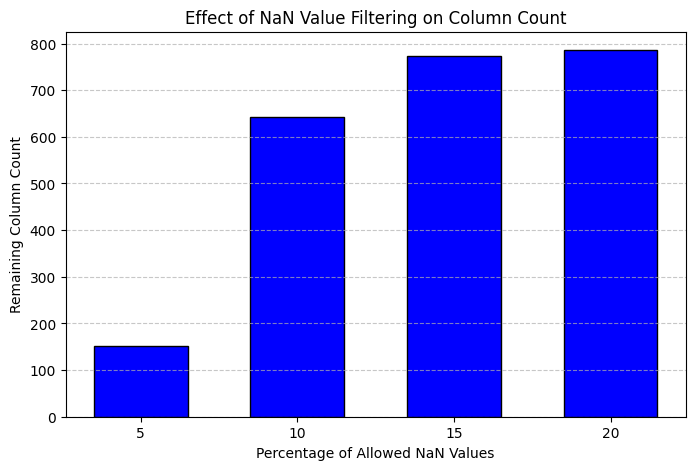

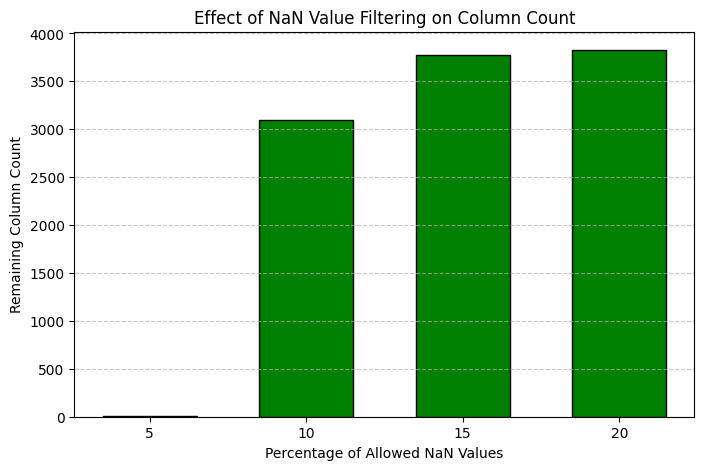

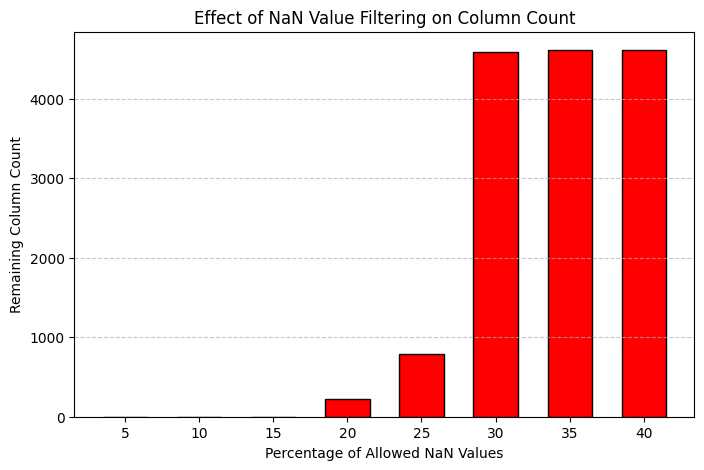

In [40]:
visualize_nan_proportion(ExE, color = 'blue', show_proportion = False)
visualize_nan_proportion(NxN, color = 'green', show_proportion = False)
visualize_nan_proportion(ExN, color = 'red', show_proportion = False)

## Filter Duplicate genes
Choose the row with less NaN values

In [42]:
ExE = remove_duplicates(ExE)
NxN = remove_duplicates(NxN)
ExN = remove_duplicates(ExN)

## Extract Data

Using KNN Imputer, as Costanzo's studies (2016 and 2021) indicate that genes with similar functions tend to exhibit similar interactions with other genes.

In [43]:
# Allow 15%, 5% NaN values for ExE
max_nans_15 = (ExE.shape[1] * 15) // 100  
ExE_cleared_15 = ExE.loc[:, ExE.isna().sum() <= max_nans_15]

max_nans_5 = (ExE.shape[1] * 5) // 100  
ExE_cleared_5 = ExE.loc[:, ExE.isna().sum() <= max_nans_5]



# Allow 15%, 10% NaN values for NxN
max_nans_15 = (NxN.shape[1] * 15) // 100  
NxN_cleared_15 = NxN.loc[:, NxN.isna().sum() <= max_nans_15]

max_nans_10 = (NxN.shape[1] * 10) // 100  
NxN_cleared_10 = NxN.loc[:, NxN.isna().sum() <= max_nans_10]



# Allow 30%, 20% NaN values for ExN
max_nans_30 = (ExN.shape[1] * 30) // 100
ExN_cleared_30 = ExN.loc[:, ExN.isna().sum() <= max_nans_30]

max_nans_20 = (ExN.shape[1] * 20) // 100
ExN_cleared_20 = ExN.loc[:, ExN.isna().sum() <= max_nans_20]


In [44]:
knn_imputer = KNNImputer(n_neighbors=3) 

ExE_imputed_15 = knn_imputer.fit_transform(ExE_cleared_15)
NxN_imputed_15 = knn_imputer.fit_transform(NxN_cleared_15)

ExE_imputed_15 = pd.DataFrame(ExE_imputed_15, columns=ExE_cleared_15.columns, index=ExE_cleared_15.index)
NxN_imputed_15 = pd.DataFrame(NxN_imputed_15, columns=NxN_cleared_15.columns, index=NxN_cleared_15.index)

ExN_filled_30 = ExN_cleared_30.fillna(ExN_cleared_30.mean()).fillna(0)

ExE_imputed_5 = knn_imputer.fit_transform(ExE_cleared_15)
NxN_imputed_10 = knn_imputer.fit_transform(NxN_cleared_15)

ExE_imputed_5 = pd.DataFrame(ExE_imputed_15, columns=ExE_cleared_15.columns, index=ExE_cleared_15.index)
NxN_imputed_10 = pd.DataFrame(NxN_imputed_15, columns=NxN_cleared_15.columns, index=NxN_cleared_15.index)

ExN_filled_20 = ExN_cleared_20.fillna(ExN_cleared_20.mean()).fillna(0)



In [45]:
ExE_imputed_15.to_csv("../extracted_data/ExE_imputed_15.csv", index=True)
NxN_imputed_15.to_csv("../extracted_data/NxN_imputed_15.csv", index=True)
ExN_filled_30.to_csv("../extracted_data/ExN_filled_30.csv", index=True)

ExE_imputed_5.to_csv("../extracted_data/ExE_imputed_5.csv", index=True)
NxN_imputed_10.to_csv("../extracted_data/NxN_imputed_10.csv", index=True)
ExN_filled_20.to_csv("../extracted_data/ExN_filled_20.csv", index=True)